In [1]:
import datetime
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

pd.options.display.max_colwidth = 30
pd.options.display.float_format = '{:,.3f}'.format

## Movies

In [2]:
movies = pd.read_csv('data/movies_clean.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 24 columns):
movie_id                27278 non-null int64
title                   27278 non-null object
year                    27256 non-null float64
parsed_genres           27278 non-null object
genre_adventure         27278 non-null int64
genre_children          27278 non-null int64
genre_animation         27278 non-null int64
genre_thriller          27278 non-null int64
genre_crime             27278 non-null int64
genre_action            27278 non-null int64
genre_scifi             27278 non-null int64
genre_fantasy           27278 non-null int64
genre_war               27278 non-null int64
genre_musical           27278 non-null int64
genre_filmnoir          27278 non-null int64
genre_romance           27278 non-null int64
genre_western           27278 non-null int64
genre_nogenreslisted    27278 non-null int64
genre_horror            27278 non-null int64
genre_imax              27278 no

In [3]:
movies.sample(10).T

,1877,25233,9187,22618,25252,25382,23159,6017,24133,7139
movie_id,1961,119051,27074,108332,119139,119948,110366,6116,114417,7251
title,Rain Man (1988),Crime at the Chinese Resta...,Brave New World (1998),Mystery of the Yellow Room...,Ascension (2014),Let's Kill Ward's Wife (2014),Jean-Michel Basquiat: The ...,"Pirate Movie, The (1982)","Average Little Man, An (Un...",Where the Day Takes You (1...
year,"1,988.000","1,981.000","1,998.000","2,003.000","2,014.000","2,014.000","2,010.000","1,982.000","1,977.000","1,992.000"
parsed_genres,['drama'],"['comedy', 'mystery', 'thr...",['scifi'],"['comedy', 'crime', 'myste...","['drama', 'scifi']",['comedy'],['documentary'],"['adventure', 'comedy', 'm...",['drama'],['drama']
genre_adventure,0,0,0,0,0,0,0,1,0,0
genre_children,0,0,0,0,0,0,0,0,0,0
genre_animation,0,0,0,0,0,0,0,0,0,0
genre_thriller,0,1,0,0,0,0,0,0,0,0
genre_crime,0,0,0,1,0,0,0,0,0,0
genre_action,0,0,0,0,0,0,0,0,0,0


In [4]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,"27,278.000","59,855.481","44,429.315",1.000,"6,931.250","68,068.000","100,293.250","131,262.000"
year,"27,256.000","1,989.372",23.336,"1,891.000","1,976.000","1,998.000","2,008.000","2,015.000"
genre_adventure,"27,278.000",0.085,0.279,0.000,0.000,0.000,0.000,1.000
genre_children,"27,278.000",0.042,0.200,0.000,0.000,0.000,0.000,1.000
genre_animation,"27,278.000",0.038,0.190,0.000,0.000,0.000,0.000,1.000
genre_thriller,"27,278.000",0.153,0.360,0.000,0.000,0.000,0.000,1.000
genre_crime,"27,278.000",0.108,0.310,0.000,0.000,0.000,0.000,1.000
genre_action,"27,278.000",0.129,0.335,0.000,0.000,0.000,0.000,1.000
genre_scifi,"27,278.000",0.064,0.245,0.000,0.000,0.000,0.000,1.000
genre_fantasy,"27,278.000",0.052,0.222,0.000,0.000,0.000,0.000,1.000


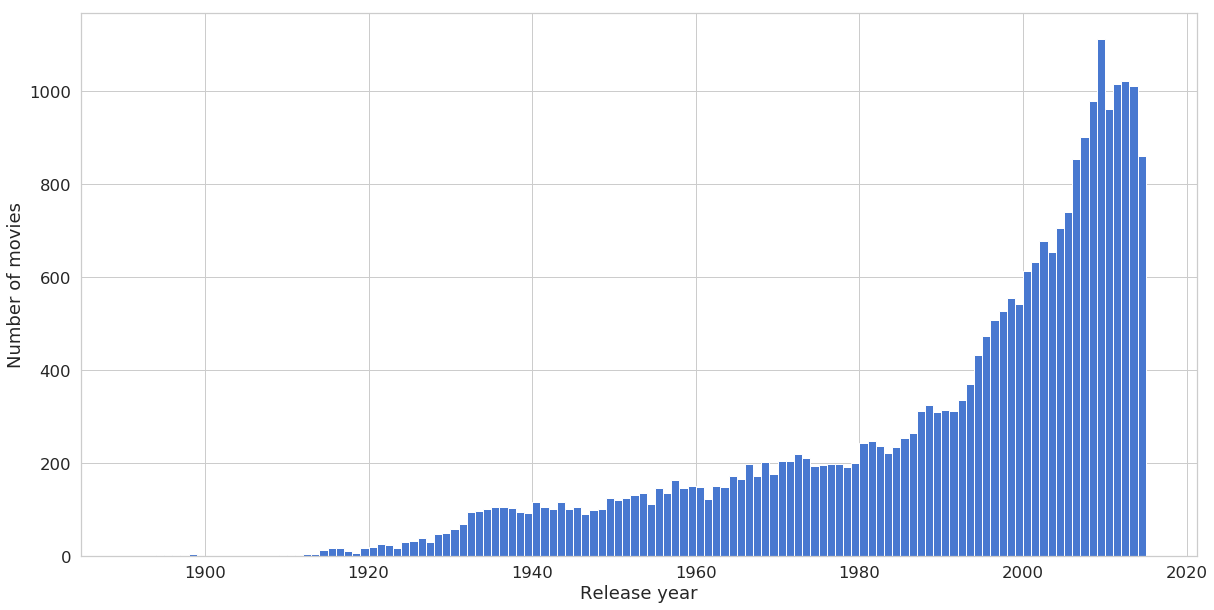

In [5]:
plt.figure(figsize=(20, 10))
years = movies.year.dropna().tolist()
bins = int(np.max(years) - np.min(years))
plt.hist(years, bins=bins)
plt.xlabel('Release year')
plt.ylabel('Number of movies')
plt.show()

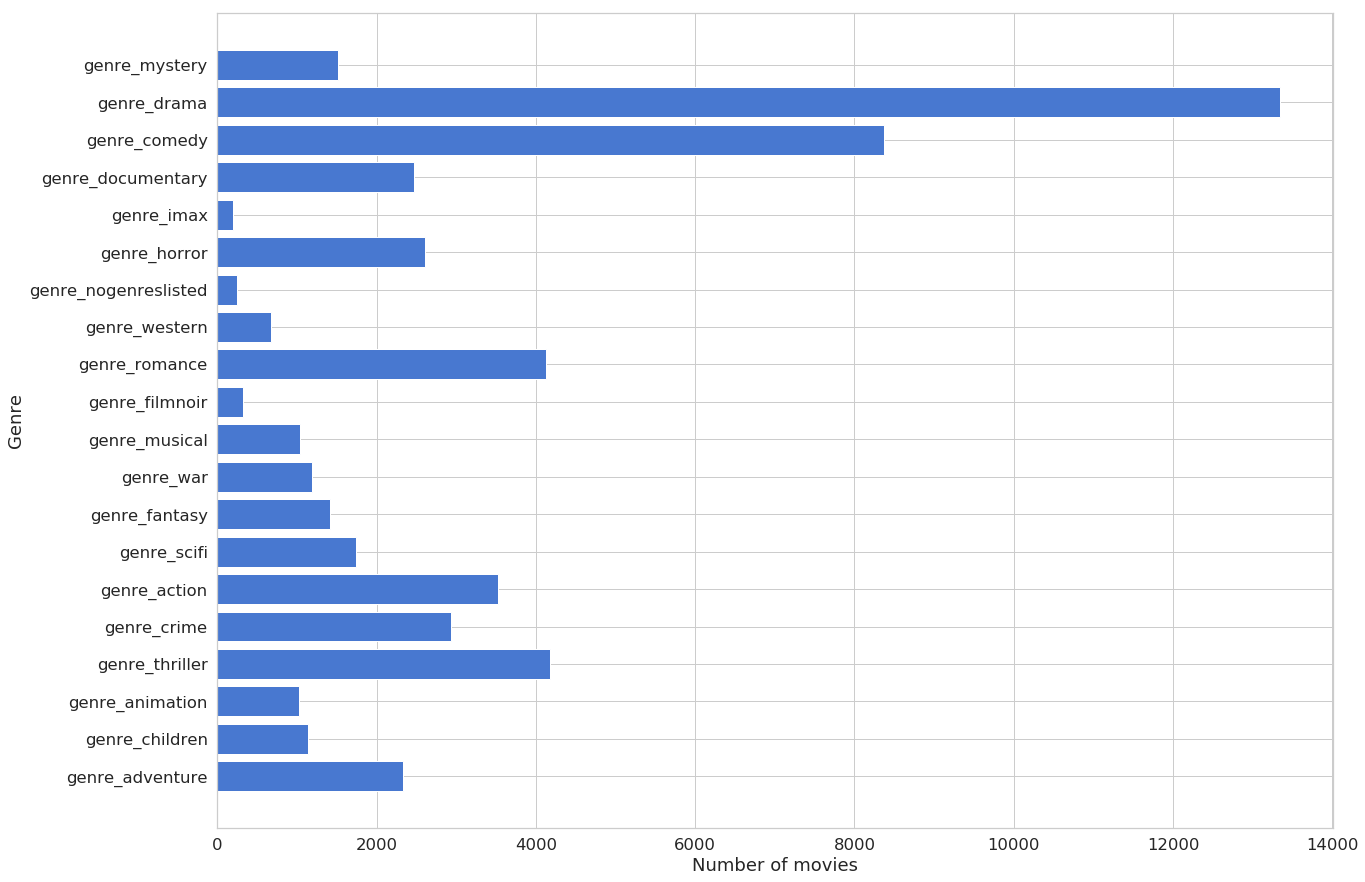

In [6]:
genre_cols = [col for col in movies.columns if col.startswith('genre_')]
genre_counts = movies.sum()[genre_cols]
plt.figure(figsize=(20, 15))
plt.barh(genre_counts.index, width=genre_counts.values)
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.show()

## Tags

In [7]:
tags = pd.read_csv('data/tags_clean.csv')
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 5 columns):
user_id      465564 non-null int64
movie_id     465564 non-null int64
tag          465548 non-null object
timestamp    465564 non-null int64
year         465564 non-null int64
dtypes: int64(4), object(1)
memory usage: 17.8+ MB


In [8]:
tags.sample(10)

,user_id,movie_id,tag,timestamp,year
56826,11248,97752,multiple storylines,1355438408,2012
442181,130827,38824,traumatic childhood,1227626017,2008
36710,9815,1343,serial killer,1400935071,2014
114935,28599,94150,based on a true story,1394668108,2014
329673,97198,3527,classic,1311157805,2011
393226,122523,26082,realistic action,1420576822,2015
86252,22074,48780,Scarlett Johansson,1368850974,2013
53707,11081,8507,TREACHEROUS SPOUSES,1172502842,2007
58579,12271,4621,John Travolta,1165704878,2006
138307,38615,1206,Nudity (Topless - Brief),1205616101,2008


In [9]:
tags.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"465,564.000","68,712.354","41,877.674",18.000,"28,780.000","70,201.000","107,322.000","138,472.000"
movie_id,"465,564.000","32,627.763","36,080.241",1.000,"2,571.000","7,373.000","62,235.000","131,258.000"
timestamp,"465,564.000","1,298,711,076.343","79,208,912.595","1,135,429,210.000","1,245,007,262.500","1,302,291,181.000","1,366,217,861.250","1,427,771,352.000"
year,"465,564.000","2,010.697",2.500,"2,005.000","2,009.000","2,011.000","2,013.000","2,015.000"


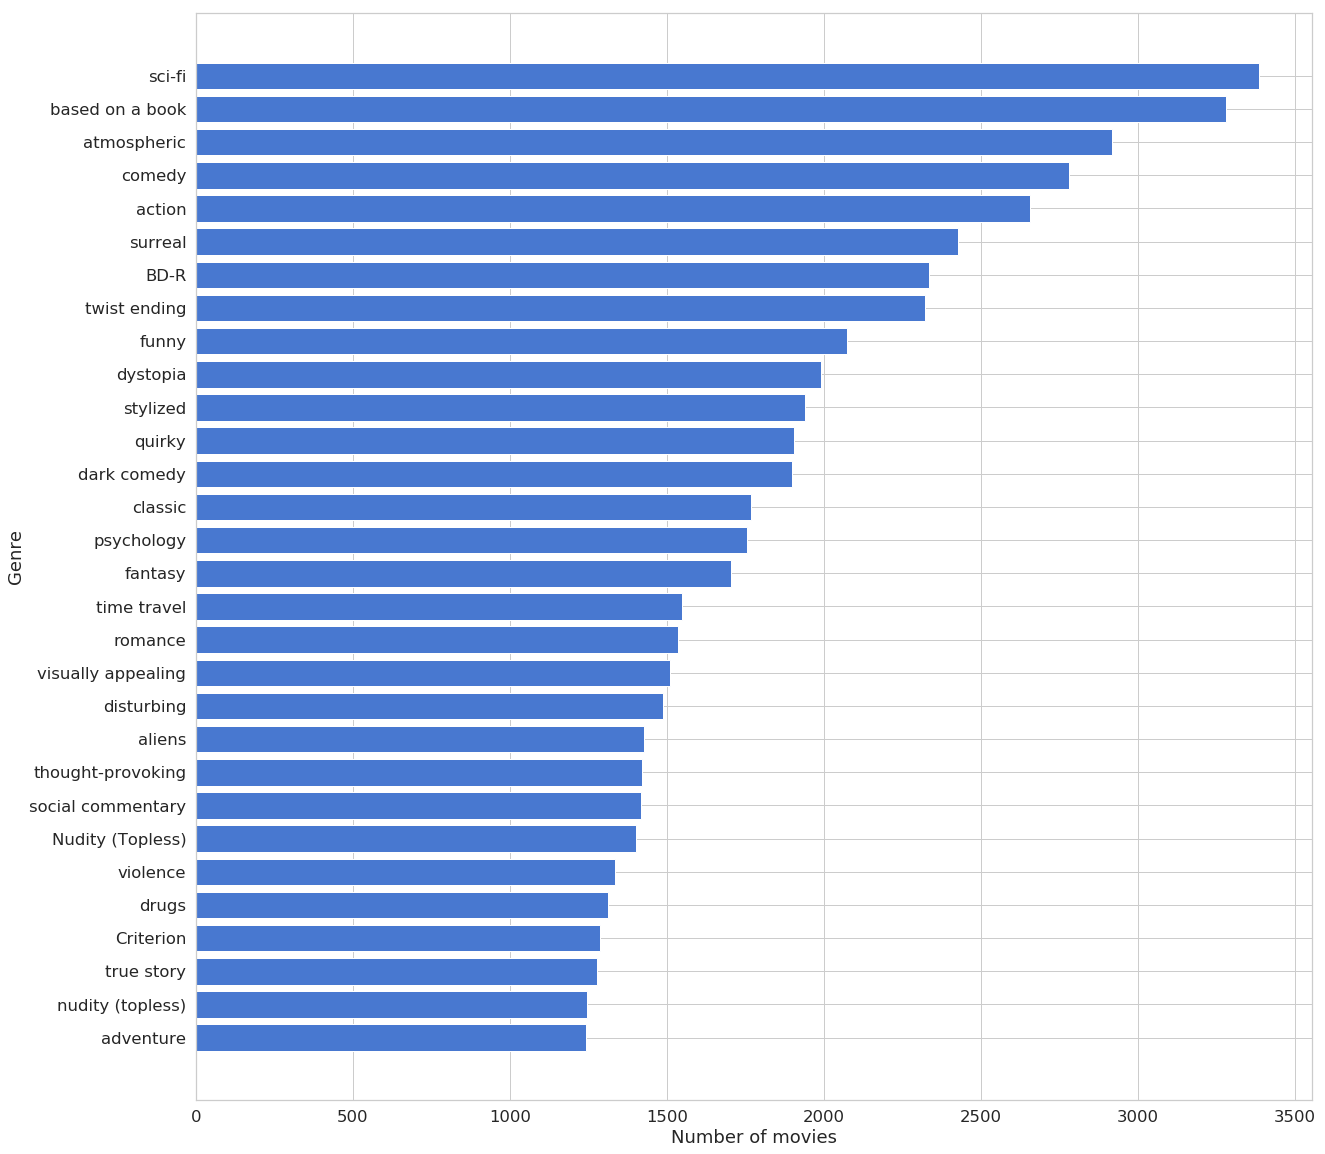

In [10]:
tag_counts = tags.tag.value_counts()[:30][::-1]
plt.figure(figsize=(20, 20))
plt.barh(tag_counts.index, width=tag_counts.values)
plt.xlabel('Number of movies')
plt.ylabel('Genre')
plt.show()

## Ratings

In [11]:
ratings = pd.read_csv('data/ratings_clean.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 5 columns):
user_id      int64
movie_id     int64
rating       float64
timestamp    int64
year         int64
dtypes: float64(1), int64(4)
memory usage: 762.9 MB


In [12]:
ratings.sample(10)

,user_id,movie_id,rating,timestamp,year
5811064,40008,2959,4.000,1231036229,2009
2895131,19630,1472,3.000,945068532,1999
15624435,108063,4235,5.000,1170622829,2007
14179476,97891,292,3.000,1233752577,2009
14113568,97491,594,3.000,1102513683,2004
6937387,47816,708,3.500,1096917985,2004
4668987,32053,3827,3.000,1035986204,2002
2568462,17404,1909,3.000,1249324050,2009
18110383,125268,2734,1.000,943456957,1999
14339942,99067,3111,3.000,986016633,2001


In [13]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,"20,000,263.000","69,045.873","40,038.627",1.000,"34,395.000","69,141.000","103,637.000","138,493.000"
movie_id,"20,000,263.000","9,041.567","19,789.477",1.000,902.000,"2,167.000","4,770.000","131,262.000"
rating,"20,000,263.000",3.526,1.052,0.500,3.000,3.500,4.000,5.000
timestamp,"20,000,263.000","1,100,917,921.677","162,169,424.783","789,652,004.000","966,797,745.000","1,103,555,886.000","1,225,642,317.500","1,427,784,002.000"
year,"20,000,263.000","2,004.379",5.177,"1,995.000","2,000.000","2,004.000","2,008.000","2,015.000"


count   20,000,263.000
mean             3.526
std              1.052
min              0.500
25%              3.000
50%              3.500
75%              4.000
max              5.000
Name: rating, dtype: float64


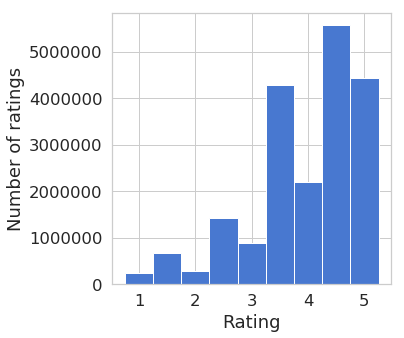

In [14]:
print(ratings.rating.describe())
plt.figure(figsize=(5, 5))
plt.hist(ratings.rating, bins=9, align='right')
plt.xlabel('Rating')
plt.ylabel('Number of ratings')
plt.show()

count   26,744.000
mean       747.841
std      3,085.818
min          1.000
50%         18.000
75%        205.000
90%      1,305.700
95%      3,612.950
99%     14,388.690
99.9%   41,460.952
max     67,310.000
Name: movie_id, dtype: float64


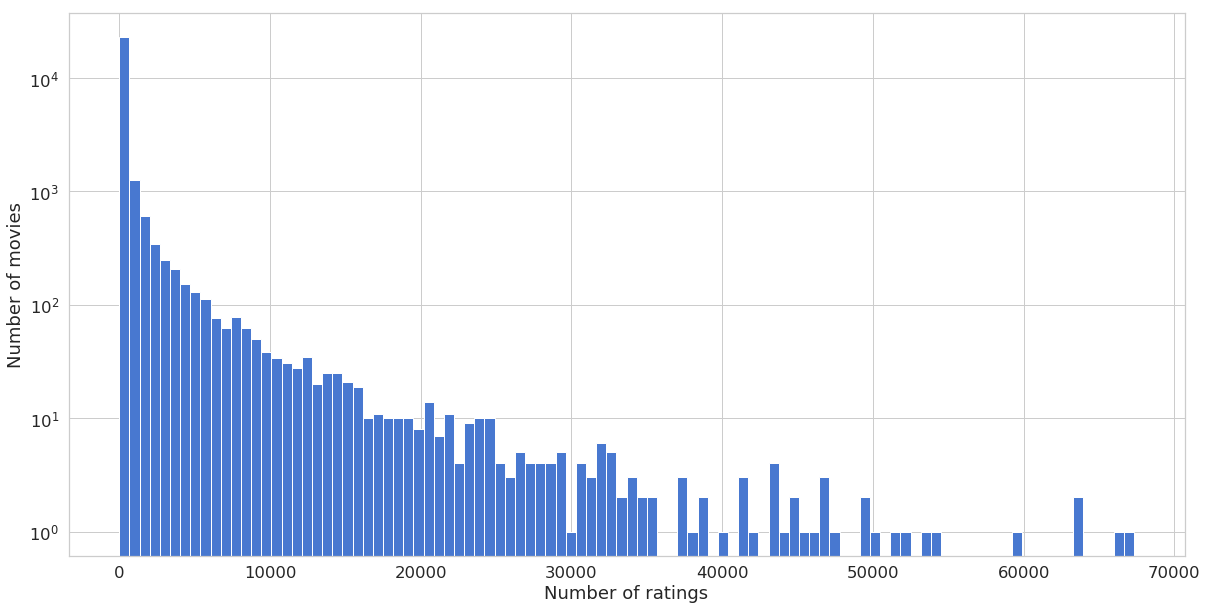

In [15]:
n_ratings = ratings.groupby(['movie_id']).movie_id.count()
print(n_ratings.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999]))
plt.figure(figsize=(20, 10))
plt.hist(n_ratings, bins=100)
plt.yscale('log')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.show()

count   138,493.000
mean        144.414
std         230.267
min          20.000
50%          68.000
75%         155.000
90%         334.000
95%         520.000
99%       1,113.080
99.9%     2,363.080
max       9,254.000
Name: movie_id, dtype: float64


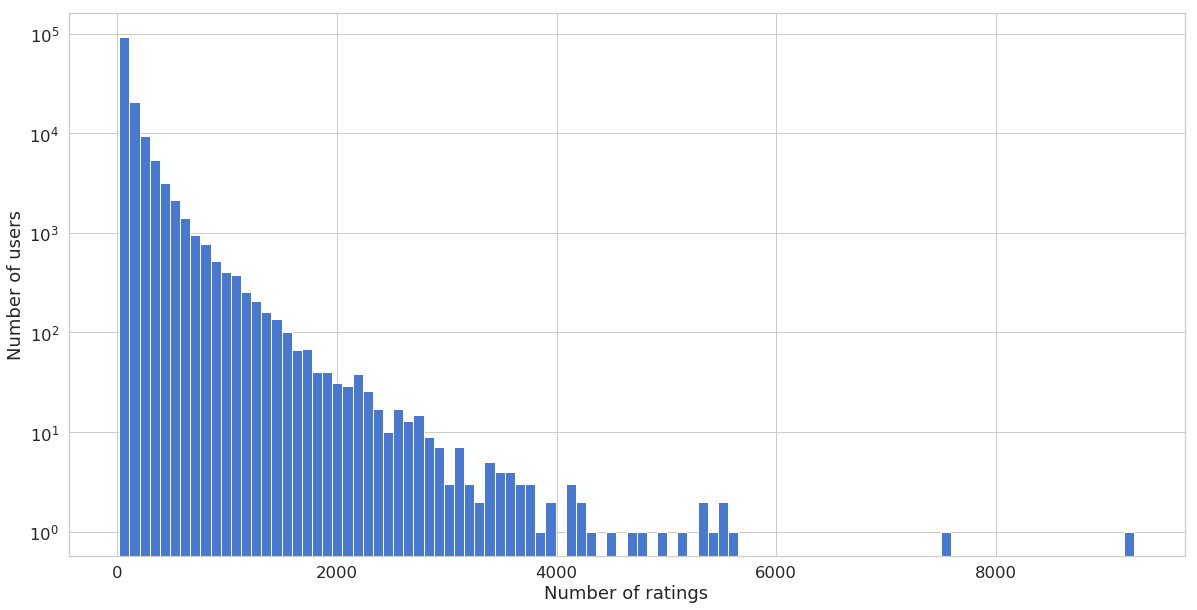

In [16]:
n_ratings = ratings.groupby(['user_id']).movie_id.count()
print(n_ratings.describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99, 0.999]))
plt.figure(figsize=(20, 10))
plt.hist(n_ratings, bins=100)
plt.yscale('log')
plt.xlabel('Number of ratings')
plt.ylabel('Number of users')
plt.show()

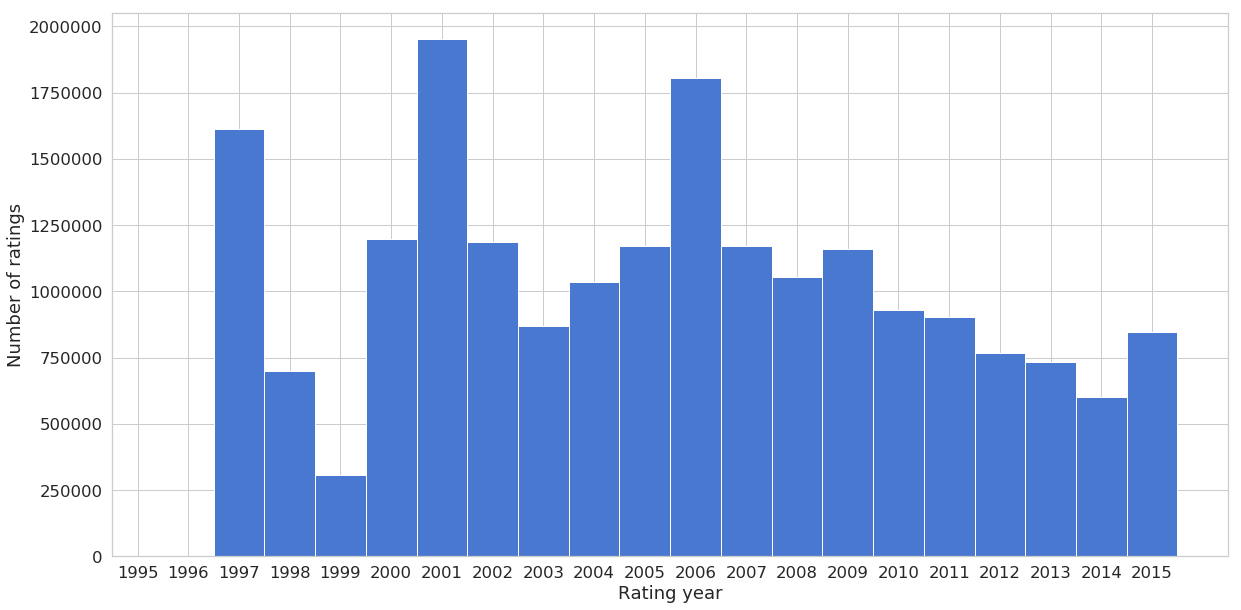

In [17]:
plt.figure(figsize=(20, 10))
years = ratings.year.dropna().astype(int).tolist()
bins = int(np.max(years) - np.min(years))
plt.hist(years, bins=bins, align='right')
plt.xlabel('Rating year')
plt.ylabel('Number of ratings')
plt.xticks(range(1995, 2016))
plt.show()